In [14]:
import pandas as pd 
import json
from arcgis.features import FeatureLayer
import requests
import time
import matplotlib.pyplot as plt

# API Pull Toggle off when not updating 

In [2]:
# # remove everything after "FeatureServer/0" in the URL 
# url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/2023CrimeData_OpenData/FeatureServer/0'

# batch_size = 1000  # Number of records to retrieve per batch
# offset = 0  # Initial offset value
# data_list = []
# # ​Create the feature layer object
# feature_layer = FeatureLayer(url)

# while True:
#     # Query the feature layer with pagination
#     query_result = feature_layer.query(where='1=1', out_fields='*', return_geometry=False, result_offset=offset, result_record_count=batch_size)
    
#     # Retrieve the features from the query result
#     features = query_result.features
    
#     # Process the data for the current batch
#     for feature in features:
#         data_list.append(feature.attributes)
    
#     # Break the loop if the response is empty or the desired number of records is reached
#     if len(features) == 0 or len(data_list) >= 1000:
#         break
    
#     # Increment the offset by the batch size
#     offset += batch_size
# # Create a DataFrame from the data list
# df = pd.DataFrame(data_list)

# df.to_csv('crime.csv')


# Reading in local data saved from the API

In [3]:
crime = pd.read_csv('crime.csv')
crime.shape

(56528, 17)

In [4]:
crime.head()

,Unnamed: 0,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
0,0,LMPD23104980,10/29/2023,1696737600000,4354.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,4th Division,411,Parking/ Drop Lot/ Garage,1400 BLOCK S 2ND ST,LOUISVILLE,40208,1
1,1,LMPD23104641,10/28/2023,1693627200000,4354.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,6th Division,612,Parking/ Drop Lot/ Garage,1300 BLOCK VIM DR,LOUISVILLE,40213,2
2,2,LMPD23104625,10/28/2023,1696996800000,8566.0,23 THEFT OTHER,TBUT OR DISP FIREARM 514.030 23100 23H,23H,A,Yes,1st Division,123,Parking/ Drop Lot/ Garage,300 BLOCK S 4TH ST,LOUISVILLE,40202,3
3,3,LMPD23104649,10/28/2023,1697688000000,4354.0,26 COUNTERFEITING,CRIMINAL POSSESSION FORGED INSTRUMENT-2ND DEGR...,250,A,Yes,4th Division,423,Residence/Home,1300 BLOCK CENTRAL AVE,LOUISVILLE,40208,4
4,4,LMPD23104167,10/27/2023,1691035200000,8142.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,7th Division,723,Other/Unknown,9100 BLOCK FERN CREEK RD,LOUISVILLE,40291,5


In [28]:
crime.tail()

,Unnamed: 0,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
56523,56523,8023010871,1/1/2023,1672549200000,7669.0,23 THEFT OTHER,TBUT OR DISP FIREARM 514.030 23100 23H,23H,A,Yes,6th Division,625,Other Residence (Apartment/Condo),3300 BLOCK BRECKENRIDGE LN,LOUISVILLE,40220,56524
56524,56524,8023000443,1/1/2023,1672549200000,2621.0,12 INTIMIDATION,INTIMIDATING A PARTICIPANT IN LEGAL PROCESS 52...,13C,A,Yes,4th Division,412,Other Residence (Apartment/Condo),200 BLOCK E KENTUCKY ST,LOUISVILLE,40203,56525
56525,56525,8023000198,1/1/2023,1672549200000,5451.0,12 INTIMIDATION,MENACING 508.050 00803 13C,13C,A,Yes,2nd Division,223,Residence/Home,1800 BLOCK DATE ST,LOUISVILLE,40210,56526
56526,56526,8023500401,1/1/2023,1672549200000,9999.0,56 ALL OTHER OFFENSES,PROPERTY LOST OR ABANDONED NON CRIMINAL 67.592...,90Z,B,Yes,4th Division,412,Residence/Home,1100 BLOCK S PRESTON ST,LOUISVILLE,40203,56527
56527,56527,8023000218,1/1/2023,1672549200000,5265.0,99 NON-REPORTABLE,RECOVERY OF STOLEN VEHICLE-OUT OF JURISDICTION...,999,B,Yes,2nd Division,236,Residence/Home,3400 BLOCK COVENTRY COMMONS DR,LOUISVILLE,40216,56528


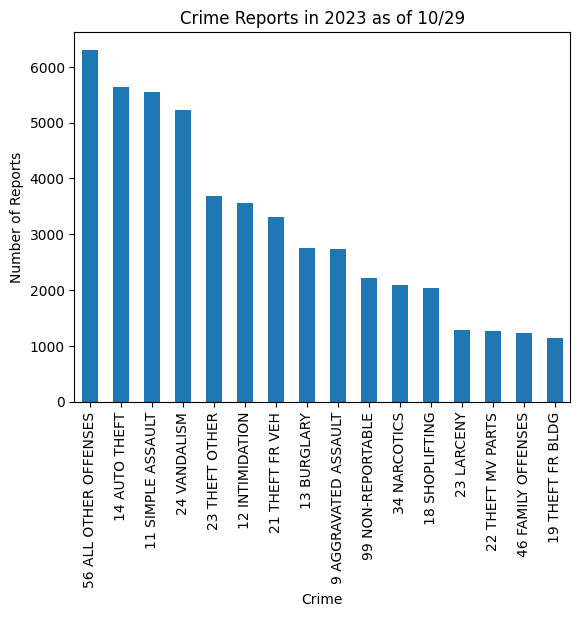

In [31]:
crime['Offense_Classification'].value_counts()[crime['Offense_Classification'].value_counts() > 1000].plot.bar(title = "Crime Reports in 2023 as of 10/29", xlabel = "Crime", ylabel = "Number of Reports");


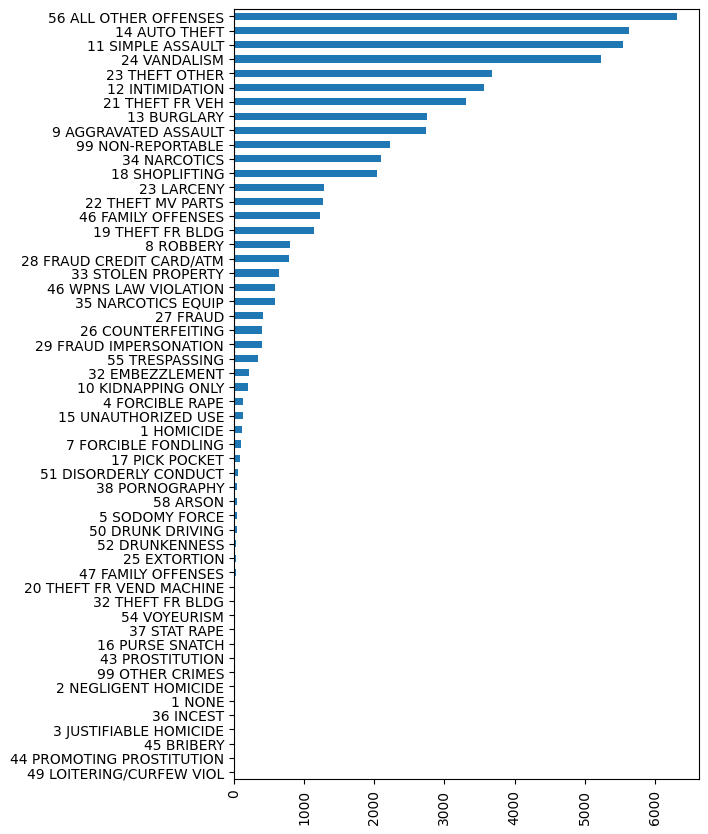

In [27]:
ax = crime['Offense_Classification'].value_counts(ascending=True).plot.barh()

fig = plt.gcf()
fig.set_size_inches(6, 10)  
plt.xticks(rotation=90)

plt.show()